In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

## 1. Gradient descent

**Gradient descent** is an optimization algorithm for finding the local minimum of a function. to find a local minimum, the function "steps" in the direction of the gradient.  
**Gradient ascent** is the same as gradient descent, except that it steps in the direction of the positive of the gradient and therefore finds local maximums.  
The algorithm of gradient descent can be outlined as follows:
1. Choose initial guess $x_0$
2. for $k=0, 1, 2, ...$ do
3. &nbsp;&nbsp;&nbsp;&nbsp;     $s_k=-\nabla f(x_k)$
4. &nbsp;&nbsp;&nbsp;&nbsp;     $x_{k+1} = x_k + \alpha s_k$  
$\alpha$ is called the learning rate.

### 1.1 Simple gradient descent

Find the local minimum of $f(x)=x^2 + 10sin(x)$

x that produces the smallest value  3.8374670375182074
Number of iterations  10


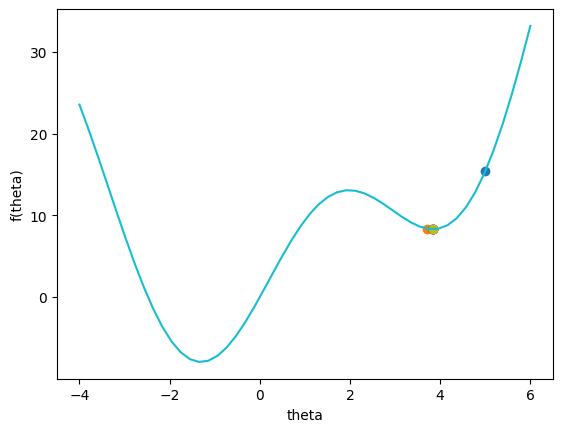

In [19]:
xs = np.linspace(-4, 6)

def f(x):
    return x**2 + 10*np.sin(x)

def df(x):
    return 2*x + 10*np.cos(x)

error = 1.0
tolerance = 1e-5
alpha = 0.1
x = 5

iteration = 1
max_iteration = 1000

while error > tolerance and iteration < max_iteration:
    plt.plot(x, f(x), 'o')
    grad = df(x)
    x -= alpha * grad
    error = abs(grad)
    iteration += 1

print ("x that produces the smallest value ", x)
print ("Number of iterations ", iteration)

plt.plot(xs, f(xs), '-')
plt.xlabel('theta')
plt.ylabel('f(theta)')

plt.show()


### 1.2 Gradient descent pratices

Find the local minimum of $f(x)=x^3-2x^2+2$

In [20]:
def f(x):
    return x**3 - 2*x**2 +2

In [21]:
def df(x):
    return 3*x**2 - 4*x

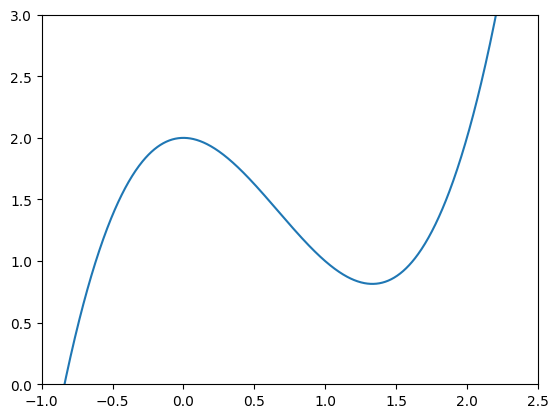

In [22]:
## Plot the graph of f(x)
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f(x))
plt.xlim([-1, 2.5])
plt.ylim([0, 3])
plt.show()

In [23]:
alpha = 0.1 ## learning rate
params = {}
params['x0'] = 2 ## initial guess
params['tolerance'] = 1e-5 ## condition to stop iteration
params['error'] = 1.0
params['max_iteration'] = 1000

In [24]:
def constant_learning_rate(iteration):
    global alpha
    return alpha

In [25]:
## function to find local minimum of f(x)
def find_minimum(params, learning_rate_function):
    '''
    params: set of parameters
    learning_rate_function: this function calculate learning rate based on number of iteration
    use alpha = learning_rate_function(iteration) to calculate alpha
    '''
    ## set up parameters
    error = params['error']
    tolerance = params['tolerance']
    max_iteration = params['max_iteration']

    iteration = 1
    x = params['x0']
    '''YOUR CODE HERE'''
    while error > tolerance and iteration < max_iteration:
          plt.plot(x, f(x), 'o')
          grad = df(x)
          x -= learning_rate_function(iteration) * grad
          error = abs(grad)
          iteration += 1
    return x, iteration

The local minimum of f(x) happens at 1.3333342605522671
Number of iterations  26


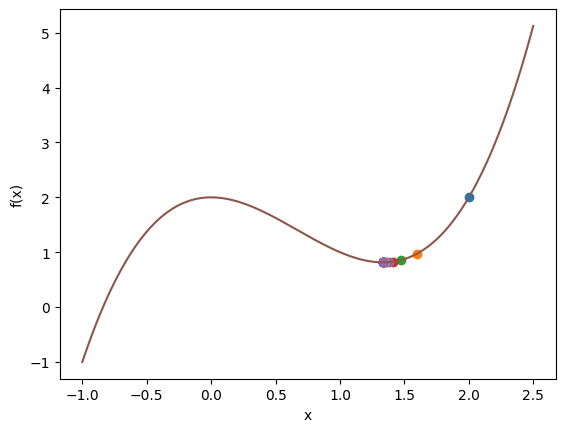

In [26]:
x, iteration = find_minimum(params, constant_learning_rate)
print ("The local minimum of f(x) happens at", x)
print ('Number of iterations ', iteration)

xs = np.linspace(-1, 2.5, 1000)
plt.plot(xs, f(xs), '-')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

Now experiment with $ x \in \{-1, 0, 100\}$, and $\alpha \in \{1, 10^{-1}, 10^{-10}\}$ and see the result.  

### 1.3. Time based decay learning rate  
The learning rate in the above implementation is constant. It presents some issues: if the learning rate is too small, then the convergence will be slow, but if we make it too large, then the method will fail to converge at all.
![image.png](attachment:image.png)
*courtesy:* [Setting the learning rate of your neural network](https://www.jeremyjordan.me/nn-learning-rate/)  
A solution to this is to use adaptive learning rates.
One approach to update the learning rate is choosing a decrease constant d than shrinks the step size over time:
    $\alpha_{t+1}=\frac{\alpha_0}{1+t \times d}$

In [27]:
# khai báo alpha = 0.1
def time_based_decay_learning_rate(iteration):
    d = 0.01 ## decrease constant
    global alpha # anpha_0 là anpha global. nếu là anpha t thì cần cập nhật lại anpha
    '''YOUR CODE HERE'''
    return alpha / (1 + d * iteration)

The local minimum of f(x) happens at 1.333334560423455
Number of iterations  30


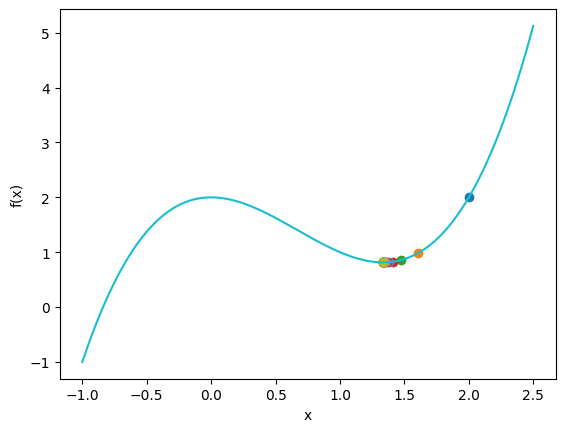

In [28]:
x, iteration = find_minimum(params, time_based_decay_learning_rate)
print ("The local minimum of f(x) happens at", x)
print ('Number of iterations ', iteration)

xs = np.linspace(-1, 2.5, 1000)
plt.plot(xs, f(xs), '-')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

### 1.4 Exponential decay learning rate
Another approach is to use the following fomular:  
$\alpha = \alpha_0  e^{-kt}$

In [29]:
alpha = 0.1
def exponential_decay_learning_rate(iteration):
    k = 0.01 ## decrease constant
    global alpha
    return alpha * np.exp(-k * iteration)

The local minimum of f(x) happens at 1.3333348037275983
Number of iterations  30


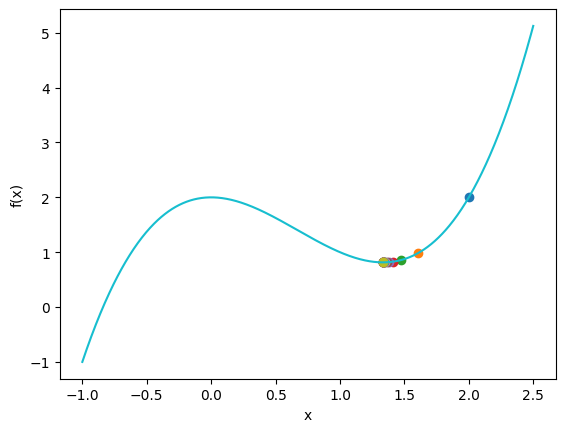

In [30]:
x, iteration = find_minimum(params, exponential_decay_learning_rate)
print ("The local minimum of f(x) happens at", x)
print ('Number of iterations ', iteration)

xs = np.linspace(-1, 2.5, 1000)
plt.plot(xs, f(xs), '-')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

## 2. Gradient Descent with momentum

One disadvantage of Gradient Descent is that it is easy to stuck in local minimum. So, by modifying the gradient descent algorithm, we hope to find the global minimum. **Gradient Descent with momentum** is one way to do that. The modified agorithm is as follows:
1. Choose initial guess $x_0$, set $v_0=0$
2. for $k=0, 1, 2, ...$ do
3. &nbsp;&nbsp;&nbsp;&nbsp;     $s_k=\nabla f(x_k)$
4. &nbsp;&nbsp;&nbsp;&nbsp;     $v_k=\gamma v_{k-1} - \alpha s_k$
5. &nbsp;&nbsp;&nbsp;&nbsp;     $x_{k+1} = x_k + v_k$  
$\alpha$ is called the learning rate, $\gamma$ is often set to $0.9$.
![image.png](attachment:image.png)  
*courtesy:* [Machine Learning cơ bản]( https://machinelearningcoban.com/2017/01/16/gradientdescent2/#-momentum)  
For example, we will find the minimum of the function $f(x)=x^2 + 10sin(x)$

x that produces the smallest value  -1.306426889698841
Number of iterations  233


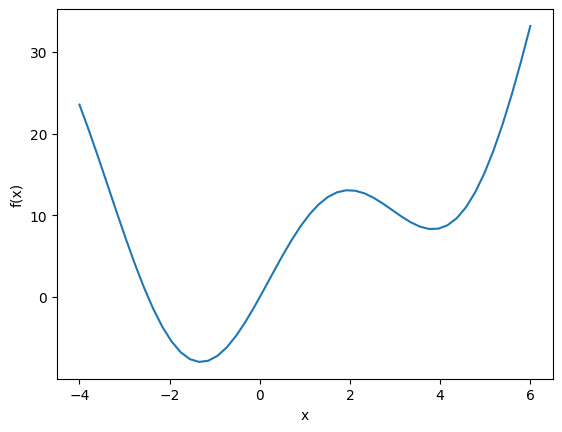

In [46]:
xs = np.linspace(-4, 6)

def f(x):
    return x**2 + 10*np.sin(x)

def df(x):
    return 2*x + 10*np.cos(x)

error = 1.0
tolerance = 1e-5
alpha = 0.1

x = 5
v = 0
gamma = 0.9
iteration = 1
max_iteration = 1000
'''YOUR CODE HERE'''
while error > tolerance and iteration < max_iteration :
        grad = df(x)
        v = gamma * v - alpha * grad
        x += v
        error = abs(grad)
        iteration += 1

print ("x that produces the smallest value ", x)
print ("Number of iterations ", iteration)

plt.plot(xs, f(xs), '-')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

Gradient Descent tends to have zigzag effect.

[-5.19728188e-10  1.03945638e-09]
2.160939112471982e-18
46


<ipython-input-32-ade502859b65>:49: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], c='red', cmap='Reds');


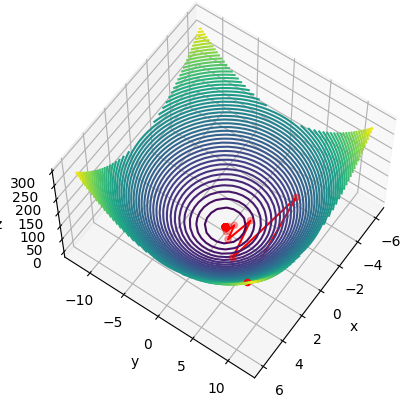

In [32]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def f(W):
    return 4*W[0]**2 + W[1]**2

def compute_gradient(W):
    return np.array([8 * W[0], 2 * W[1]])

def update(W, alpha, grad, cache):
    return W - alpha * grad, cache #vanilla update

w0_grid = np.linspace(-6, 6, 30)
w1_grid = np.linspace(-12, 12, 30)

W_grid = np.meshgrid(w0_grid, w1_grid)
Z = f(W_grid)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(W_grid[0], W_grid[1], Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.view_init(60, 35)

W = np.array([5, 10])

trajectory = [np.append(W, f(W))]

alpha = 0.2
#alpha = 0.05
tolerance = 10E-9
e = 1
cache = []

while e > tolerance:
    grad = compute_gradient(W)
    W, cache =  update(W, alpha, grad, cache)
    trajectory = np.append(trajectory, [np.append(W, f(W))], axis=0)
    e = np.amax(np.absolute(grad))

print(W)
print (f(W))
print(len(trajectory))

ax.scatter3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], c='red', cmap='Reds');
ax.plot3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 'red')

plt.show()

[-8.28542780e-09 -8.69039122e-09]
3.5011615498894393e-16
60


<ipython-input-33-32ac3db74420>:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], c='red', cmap='Reds');


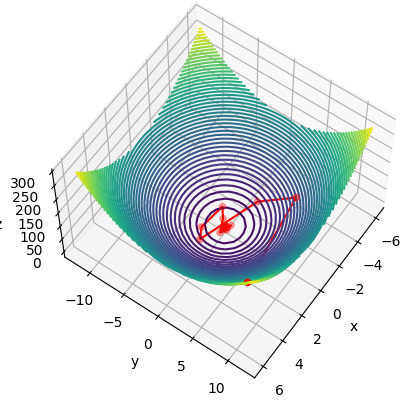

In [33]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def f(W):
    return 4*W[0]**2 + W[1]**2

def compute_gradient(W):
    return np.array([8 * W[0], 2 * W[1]])

def update(W, v, gamma, alpha, grad, cache):
    v = gamma * v - alpha * grad
    return W + v, v, cache #momentum update

w0_grid = np.linspace(-6, 6, 30)
w1_grid = np.linspace(-12, 12, 30)

W_grid = np.meshgrid(w0_grid, w1_grid)
Z = f(W_grid)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(W_grid[0], W_grid[1], Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.view_init(60, 35)

W = np.array([5, 10])
v = np.array([0, 0])
trajectory = [np.append(W, f(W))]

#alpha = 0.05
alpha = 0.2
gamma = 0.5
#alpha = 0.05
tolerance = 10E-9
e = 1
cache = []

while e > tolerance:
    grad = compute_gradient(W)
    W, v, cache =  update(W, v, gamma, alpha, grad, cache)
    trajectory = np.append(trajectory, [np.append(W, f(W))], axis=0)
    e = np.amax(np.absolute(grad))

print(W)
print (f(W))
print(len(trajectory))

ax.scatter3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], c='red', cmap='Reds');
ax.plot3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 'red')

plt.show()

### 3. Nesterov Momentum  
1. Choose initial guess $x_0$, set $v_0=0$.
2. for $k=0, 1, 2, ...$ do
3. &nbsp;&nbsp;&nbsp;&nbsp;     $x\_ahead=x + \gamma v$
4. &nbsp;&nbsp;&nbsp;&nbsp;     $s_k=\nabla f(x\_ahead)$
4. &nbsp;&nbsp;&nbsp;&nbsp;     $v_k=\gamma v_{k-1} - \alpha s_k$
5. &nbsp;&nbsp;&nbsp;&nbsp;     $x_{k+1} = x_k + v_k$  
$\alpha$ is called the learning rate, $\gamma$ is often set to $0.9$.
![image.png](attachment:image.png)
*courtesy:* [cs231 notes](http://cs231n.github.io/neural-networks-3/)  
We will find the minimum of the function $f(x)=x^2 + 10sin(x)$ using Nesterov momentum method.

x that produces the smallest value  -1.306439885231718
Number of iterations  32


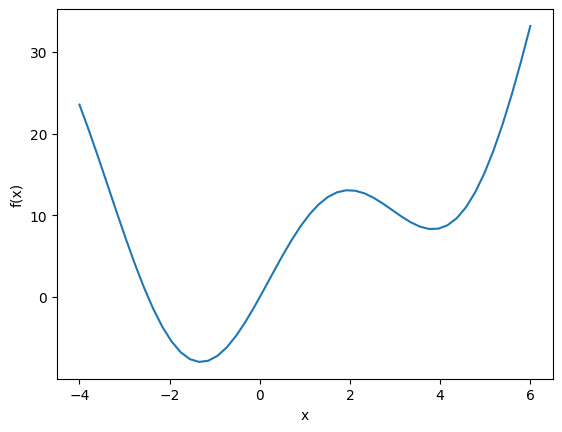

In [47]:
xs = np.linspace(-4, 6)

def f(x):
    return x**2 + 10*np.sin(x)

def df(x):
    return 2*x + 10*np.cos(x)

error = 1.0
tolerance = 1e-5
alpha = 0.1

x = 5
v = 0
gamma = 0.9
iteration = 1
max_iteration = 1000
'''YOUR CODE HERE'''
while error > tolerance and iteration < max_iteration :
        x_ahead = x + gamma * v
        grad = df(x_ahead)
        v = gamma * v - alpha * grad
        x += v
        error = abs(grad)
        iteration += 1

print ("x that produces the smallest value ", x)
print ("Number of iterations ", iteration)

#xs = np.linspace(-1, 2.5, 1000)
plt.plot(xs, f(xs), '-')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

## 5. References  
1. http://cs231n.github.io/neural-networks-3/
2. https://machinelearningcoban.com/2017/01/16/gradientdescent2/#-momentum
3. https://www.jeremyjordan.me/nn-learning-rate/